# 1D Wannier test

## 1-site test

### 1x1 set by stack 2 half trap together

Nsite = 2

trap_center = [-0.5, 0.5]

reflection = [0, 1, 0, 1]

#### 1D

In [42]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 10
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([2], dtype=int),
    trap=(50, (930, 1250)),
    lc=(0, 1600),
    band=1,
    dim=1,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

k = 6
p_list = sector(dvr)
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    print(f'Solve {p} sector.')
    parity = dvr.p.copy()
    parity[:len(p)] = p
    dvr.update_p(parity)

    Em, Wm = dvr.H_solver(k)
    E_sb = np.append(E_sb, Em)
    W_sb += [Wm[:, i].reshape(dvr.n + 1 - dvr.init) for i in range(k)]
    # Parity sector marker
    p_sb = np.append(p_sb, np.tile(p, (k, 1)), axis=0)


# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]

print(f'E = {E_sb}')
print(f'parity = {p_sb}')

# A, U = singleband_optimize(dvr, E, W, p)
# V = singleband_interaction(dvr, U, U, W, W, p,  p)
# # for i in range(dvr.bands):
# #     mu = np.diag(A[i])  # Diagonals are mu_i
# #     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
# #     print(f'V_{i+1}_i = ', np.real(mu))
# #     print(f't_{i+1}_ij =', abs(t))
# mu = np.diag(A)  # Diagonals are mu_i
# t = -(A - np.diag(mu))  # Off-diagonals are t_ij
# print('V_i = ', np.real(mu))
# print('t_ij =', abs(t))
# print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-0.81764427 -0.48432265 -0.22424979 -0.04447679  0.01983552  0.04584088]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]


##### Lattice 1x1

In [45]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 10
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([1], dtype=int),
    trap=(50, (930, 1250)),
    lc=(0, 1600),
    band=1,
    dim=1,
    avg=1,
    sparse=True,
    verbosity=0)

k = 6
p_list = sector(dvr)
E = np.array([])
W = []
p = np.array([], dtype=int).reshape(0, 3)
for parity in p_list:
    print(f'parity = {parity}')
    E, W, p = solve_sector(parity, dvr, k, E, W, p)
E

parity = (1, 1, 1)


array([-0.81764427, -0.22424979,  0.01983552,  0.09098092,  0.2137715 ,
        0.3775416 ])

#### DVR single-site

In [47]:
from DVR.core import *
import numpy as np

N = 10
R0 = np.array([3, 3, 7.2])
dvr = DVR(np.array([N, 0, 0], dtype=int),
          R0=R0,
          trap=(50, (930, 1250)),
          avg=1,
          sparse=True,
          verbosity=0)
E, W = dvr.H_solver(k=6)
E

array([-0.81764427, -0.48432265, -0.22424979, -0.04447679,  0.01983552,
        0.04584088])

1D matches.

#### 2D

In [37]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 3
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([2], dtype=int),
    trap=(50, 1000),
    lc=(0, 1600),
    band=1,
    dim=2,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

k = 4
p_list = sector(dvr)
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    print(f'Solve {p} sector.')
    parity = dvr.p.copy()
    parity[:len(p)] = p
    dvr.update_p(parity)

    Em, Wm = dvr.H_solver(k)
    E_sb = np.append(E_sb, Em)
    W_sb += [Wm[:, i].reshape(dvr.n + 1 - dvr.init) for i in range(k)]
    # Parity sector marker
    p_sb = np.append(p_sb, np.tile(p, (k, 1)), axis=0)


# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]

print(f'E = {E_sb}')
print(f'parity = {p_sb}')

# A, U = singleband_optimize(dvr, E, W, p)
# V = singleband_interaction(dvr, U, U, W, W, p,  p)
# # for i in range(dvr.bands):
# #     mu = np.diag(A[i])  # Diagonals are mu_i
# #     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
# #     print(f'V_{i+1}_i = ', np.real(mu))
# #     print(f't_{i+1}_ij =', abs(t))
# mu = np.diag(A)  # Diagonals are mu_i
# t = -(A - np.diag(mu))  # Off-diagonals are t_ij
# print('V_i = ', np.real(mu))
# print('t_ij =', abs(t))
# print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-0.89483896 -0.05609852 -0.05162838 -0.03050462]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]]


In [22]:
from DVR.core import *
import numpy as np

N = 3
R0 = np.array([3, 3, 7.2])
dvr = DVR(np.array([N, N, 0], dtype=int),
          R0=R0,
          trap=(50, 1000),
          avg=1,
          sparse=True,
          symmetry=True,
          parity=np.array([1, 1, 0], dtype=int),
          verbosity=0)
Ep, Wp = dvr.H_solver(k=4)
dvr = DVR(np.array([N, N, 0], dtype=int),
          R0=R0,
          trap=(50, 1000),
          avg=1,
          sparse=True,
          symmetry=True,
          parity=np.array([-1, 1, 0], dtype=int),
          verbosity=0)
Em, Wm = dvr.H_solver(k=4)
print(Ep)
print(Em)

[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[0.]]
[[[-1.00000000e+00]
  [-1.35335283e-01]
  [-3.35462628e-04]
  [-1.52299797e-08]]

 [[-1.35335283e-01]
  [-1.83156389e-02]
  [-4.53999298e-05]
  [-2.06115362e-09]]

 [[-3.35462628e-04]
  [-4.53999298e-05]
  [-1.12535175e-07]
  [-5.10908903e-12]]

 [[-1.52299797e-08]
  [-2.06115362e-09]
  [-5.10908903e-12]
  [-2.31952283e-16]]]
[[ 0.04687987 -0.0298731   0.00630136]
 [-0.0298731   0.05318123 -0.03226294]
 [ 0.00630136 -0.03226294  0.05434815]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.057382

In [14]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 3
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([1], dtype=int),
    trap=(50, 1000),
    lc=(0, 1600),
    band=1,
    dim=2,
    avg=1,
    sparse=True,
    verbosity=0)

k = 4
dim = 3
p_list = sector(dvr)
E = np.array([])
W = []
p = np.array([], dtype=int).reshape(0, dim)
for parity in p_list:
    print(f'parity = {parity}')
    E, W, p = solve_sector(parity, dvr, k, E, W, p)
E

parity = (1, 1, 1)
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[0.]]
[[[-1.00000000e+00]
  [-1.35335283e-01]
  [-3.35462628e-04]
  [-1.52299797e-08]]

 [[-1.35335283e-01]
  [-1.83156389e-02]
  [-4.53999298e-05]
  [-2.06115362e-09]]

 [[-3.35462628e-04]
  [-4.53999298e-05]
  [-1.12535175e-07]
  [-5.10908903e-12]]

 [[-1.52299797e-08]
  [-2.06115362e-09]
  [-5.10908903e-12]
  [-2.31952283e-16]]]


array([-0.89483896, -0.05162838, -0.03050462,  0.01945654])

## 1D DVR Wannier

### 3x1

In [5]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([3], dtype=int),
    trap=(50, 1000),
    lc=(900, 1600),
    band=1,
    dim=1,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
[[ 2.45696362 -2.11234684  0.52808671 -0.2347052   0.13202168 -0.08449387
   0.0586763  -0.04310912  0.03300542 -0.02607836  0.02112347 -0.01745741
   0.01466908 -0.01249909  0.01077728 -0.00938821  0.00825135 -0.00730916
   0.00651959 -0.00585138  0.00528087 -0.0047899   0.00436435 -0.00399309
   0.00366727 -0.00337975  0.00312477]
 [-2.11234684  2.83037732 -1.65961642  0.46676712 -0.22570783  0.13484383
  -0.09022894  0.06482877 -0.04892293  0.0382749  -0.03078444  0.02530915
  -0.02118245  0.01799329 -0.01547666  0.01345528 -0.01180682  0.01044463
  -0.0093059   0.00834418 -0.00752452  0.0068202  -0.00621052  0.00567921
  -0.00521339  0.0048027  -0.00443876]
 [ 0.52808671 -1.65961642  2.55031705 -1.55340097  0.4149041  -0.19644439
   0.11669178 -0.07818637  0.05642696 -0.042827    0.03371096 -0.02727838
   0.02255724 -0.01898272  0.01620719 -0.01400655  0.01223073 -0.01077601
   0.00956873 -0.00855533  0.00769611 -0.00696109  0.00632729 -0.00577682
   0.00529

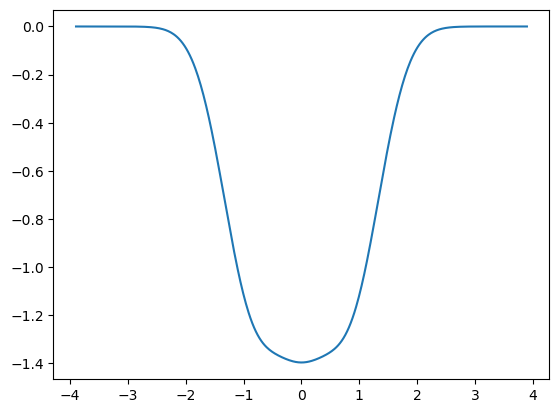

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x, v[:, 0, 0])


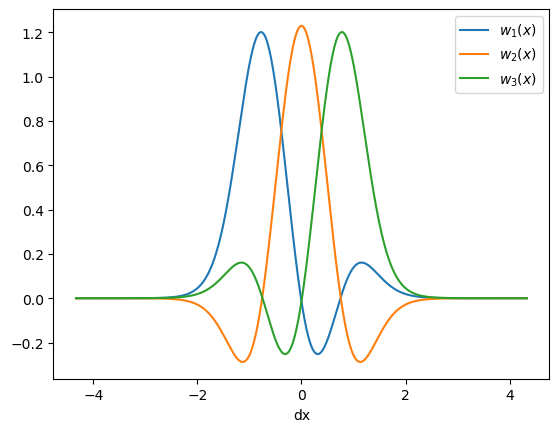

In [7]:
mu = 0
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / dvr.lc[0],
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


In [11]:
from scipy.integrate import simps
wf = wannier_func(dvr, W, U, p, [x, y, z])[:, 0, 0, :]


dx = x[1] - x[0]
print(simps(wf[:, 0] * wf[:, 1], dx=dx))
print(simps(wf[:, 0] * wf[:, 2], dx=dx))
print(simps(wf[:, 1] * wf[:, 2], dx=dx))

1.9093437293492816e-14
-1.650404614379397e-14
1.9352593160426623e-14


### 4x1

In [12]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([3], dtype=int),
    trap=(50, 1000),
    lc=(900, 1600),
    band=1,
    dim=1,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
[[ 2.45696362 -2.11234684  0.52808671 -0.2347052   0.13202168 -0.08449387
   0.0586763  -0.04310912  0.03300542 -0.02607836  0.02112347 -0.01745741
   0.01466908 -0.01249909  0.01077728 -0.00938821  0.00825135 -0.00730916
   0.00651959 -0.00585138  0.00528087 -0.0047899   0.00436435 -0.00399309
   0.00366727 -0.00337975  0.00312477]
 [-2.11234684  2.83037732 -1.65961642  0.46676712 -0.22570783  0.13484383
  -0.09022894  0.06482877 -0.04892293  0.0382749  -0.03078444  0.02530915
  -0.02118245  0.01799329 -0.01547666  0.01345528 -0.01180682  0.01044463
  -0.0093059   0.00834418 -0.00752452  0.0068202  -0.00621052  0.00567921
  -0.00521339  0.0048027  -0.00443876]
 [ 0.52808671 -1.65961642  2.55031705 -1.55340097  0.4149041  -0.19644439
   0.11669178 -0.07818637  0.05642696 -0.042827    0.03371096 -0.02727838
   0.02255724 -0.01898272  0.01620719 -0.01400655  0.01223073 -0.01077601
   0.00956873 -0.00855533  0.00769611 -0.00696109  0.00632729 -0.00577682
   0.00529

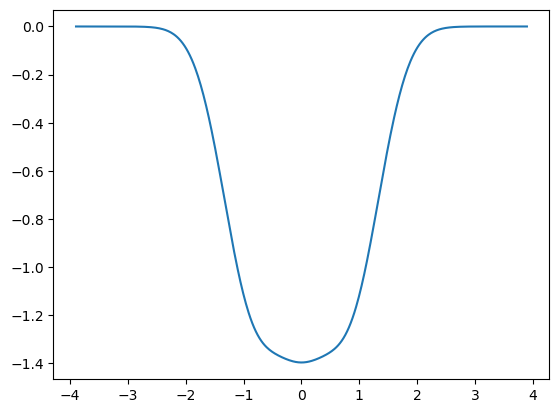

In [13]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x, v[:, 0, 0])


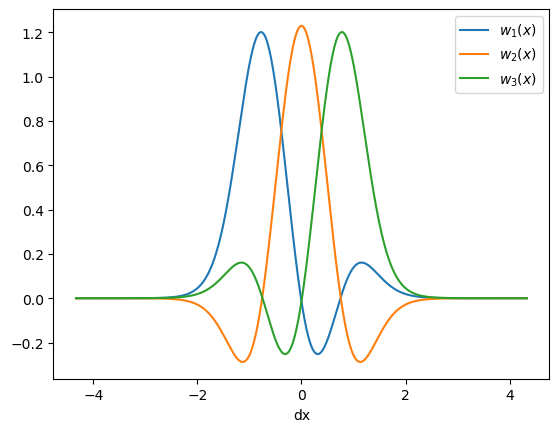

In [14]:
mu = 0
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / dvr.lc[0],
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


In [15]:
from scipy.integrate import simps
wf = wannier_func(dvr, W, U, p, [x, y, z])[:, 0, 0, :]


dx = x[1] - x[0]
print(simps(wf[:, 0] * wf[:, 1], dx=dx))
print(simps(wf[:, 0] * wf[:, 2], dx=dx))
print(simps(wf[:, 1] * wf[:, 2], dx=dx))

-1.8862048125125562e-14
1.8206925797267733e-14
1.88250258577111e-14


## 2D DVR Wannier

In [31]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(400, 1600),
    band=1,
    dim=2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-2.33769044 -1.96919497 -1.61360687 -1.28893511]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]]
V_i =  [ -95.46249617  -64.45611051 -105.09026658  -95.46249617]
t_ij = [[ 0.          0.22621387 12.00015005  2.99725227]
 [ 0.22621387  0.          0.22233256  0.22621387]
 [12.00015005  0.22233256  0.         12.00015005]
 [ 2.99725227  0.22621387 12.00015005  0.        ]]
U_i = [5.23420491 2.30297627 6.02230222 5.23420491]


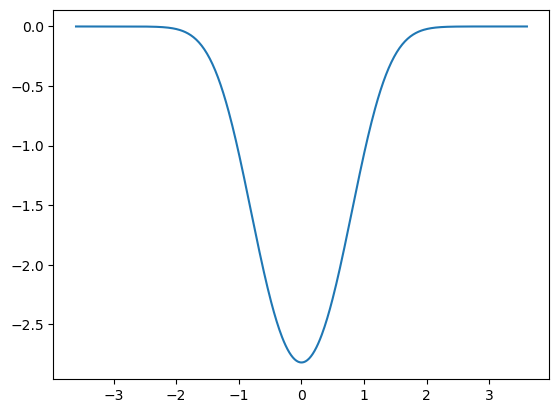

In [32]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x, v[:, 0, 0])


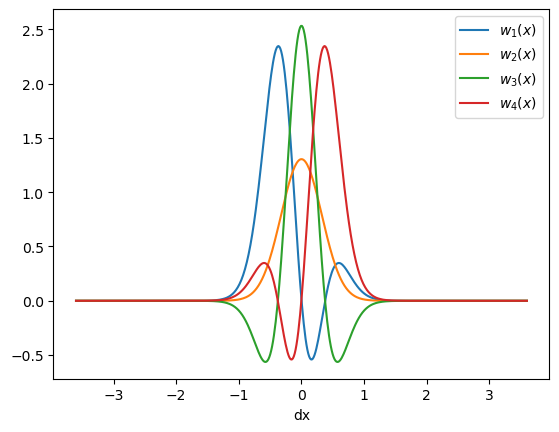

In [33]:
mu = 0
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


## 3D DVR Wannier

In [35]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(1000, 1600),
    band=1,
    dim=3,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-1.02163072 -0.97328556 -0.93709504 -0.89827258]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]]
V_i =  [-48.13172222 -46.85384294 -48.39690734 -48.13172222]
t_ij = [[0.         0.02231302 2.16204412 0.53255584]
 [0.02231302 0.         0.02770626 0.02231302]
 [2.16204412 0.02770626 0.         2.16204412]
 [0.53255584 0.02231302 2.16204412 0.        ]]
U_i = [0.9495658  0.3322762  0.89043996 0.9495658 ]


So the 'resolvability' is becoming worse with higher dimension.

### Wannier function plots

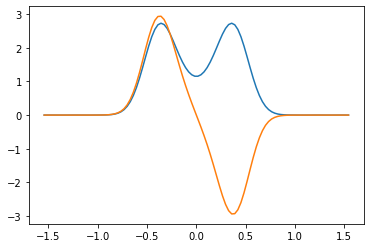

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] / 2, dvr.R0[0] / 2, 100)
y = np.array([0])
V = np.array([]).reshape(len(x), 0)
for i in range(parity.shape[0]):
    p = np.concatenate((parity[i], [1]))
    V = np.append(V,
                  psi(dvr.n, dvr.dx, W[i], x, y, y, p).reshape(-1, 1),
                  axis=1)
plt.plot(x * dvr.w * a0 * 1E9 / ax, positify(V))


/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


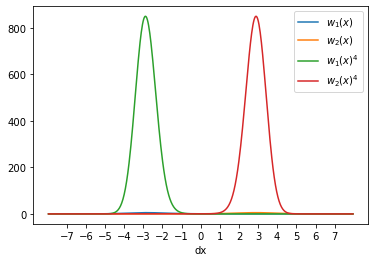

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] / 3, dvr.R0[0] / 3, 500)
y = np.array([0])
# plt.plot(x * dvr.w * a0 * 1E9 / ax,
c = int(x[0] / dvr.dx[0])
plt.xticks(np.arange(c, -c + 1, 1.0))
plt.plot(x / dvr.dx[0],
         positify(wannier_func(x, y, y, dvr, W, U, parity).reshape(-1, 2)),
         label=('$w_1(x)$', '$w_2(x)$'))
plt.plot(x / dvr.dx[0],
         positify(wannier_func(x, y, y, dvr, W, U, parity).reshape(-1, 2))**4,
         label=('$w_1(x)^4$', '$w_2(x)^4$'))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()


In [ ]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([4, 4, 4])
dvr = Wannier(N,
              R0,
              lattice=np.array([2], dtype=int),
              lc=(10, 1),
              model='sho',
              dim=3,
              avg=1,
              sparse=True,
              symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))


DVR: dx=[0.2 0.2 0.2]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[4 4 4]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=1.0 w=1.0
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [10  1 10]w
DVR: dx=[0.2 0.2 0.2]w is set.
DVR: n=[45 20 20] is set.
DVR: R0=[9. 4. 4.]w is set.
H_op: n=[45 20 20] dx=[0.2 0.2 0.2]w p=[1 1 1] sho sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[45 20 20] dx=[0.2 0.2 0.2]w p=[1 1 1] sho operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: sho Hamiltonian solved. Time spent: 0.68s.
H_solver: eigenstates memory usage: 0.31 MiB.
H_op: n=[45 20 20] dx=[0.2 0.2 0.2]w p=[-1  1  1] sho sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[45 20 20] dx=[0.2 0.2 0.2]w p=[-1  1  1] sho operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: sho Hamiltonian solved. Time spent: 0.63s.
H_solver: eigenstates memory